In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Vorhersageziel
Ich möchte gerne den Daten-Feld `median_house_value` vorhersagen, da es für mich als bestes geeignetes gesehen habe.

In [2]:
df = pd.read_csv("C:/BBB/2. Jahr/259/LB/archive/1553768847-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Hier sehen wir die Mittelwerte, Min/Max-Werte und Verteilungen der numerischen Daten.

# 2. Beschreibung der Daten
Hier habe ich die relevanten Informationen mit deren Median und Standardabweichung dargestellt.

In [4]:
numerical_df = df.select_dtypes(include='number')
stat_table = pd.DataFrame({
    "Median": numerical_df.median(),
    "Standardabweichung": numerical_df.std()
})
display(stat_table)

,Median,Standardabweichung
longitude,-118.4900,2.003532
latitude,34.2600,2.135952
housing_median_age,29.0000,12.585558
total_rooms,2127.0000,2181.615252
total_bedrooms,435.0000,421.385070
population,1166.0000,1132.462122
households,409.0000,382.329753
median_income,3.5348,1.899822
median_house_value,179700.0000,115395.615874


In [5]:
print("Median Income - Median:", df["median_income"].median())
print("Median Income - StdDev:", df["median_income"].std())

print("Housing Median Age - Median:", df["housing_median_age"].median())
print("Housing Median Age - StdDev:", df["housing_median_age"].std())

print("Total Rooms - Median:", df["total_rooms"].median())
print("Total Rooms - StdDev:", df["total_rooms"].std())

print("Total Bedrooms - Median:", df["total_bedrooms"].median())
print("Total Bedrooms - StdDev:", df["total_bedrooms"].std())

print("Population - Median:", df["population"].median())
print("Population - StdDev:", df["population"].std())

print("Households - Median:", df["households"].median())
print("Households - StdDev:", df["households"].std())

print("Median House Value - Median:", df["median_house_value"].median())
print("Median House Value - StdDev:", df["median_house_value"].std())

Median Income - Median: 3.5347999999999997
Median Income - StdDev: 1.8998217179452688
Housing Median Age - Median: 29.0
Housing Median Age - StdDev: 12.58555761211165
Total Rooms - Median: 2127.0
Total Rooms - StdDev: 2181.615251582795
Total Bedrooms - Median: 435.0
Total Bedrooms - StdDev: 421.3850700740323
Population - Median: 1166.0
Population - StdDev: 1132.462121765341
Households - Median: 409.0
Households - StdDev: 382.32975283161073
Median House Value - Median: 179700.0
Median House Value - StdDev: 115395.61587441387


# 3. Visualisierung
Hier habe ich 2 Grafiken über das Einkommen.

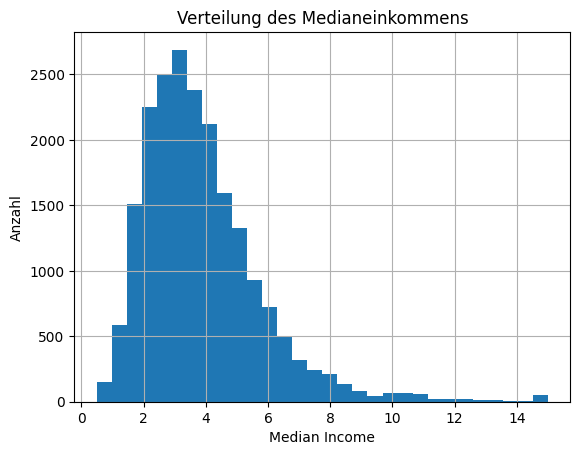

In [6]:
# Histogramm
df["median_income"].hist(bins=30)
plt.title("Verteilung des Medianeinkommens")
plt.xlabel("Median Income")
plt.ylabel("Anzahl")
plt.show()

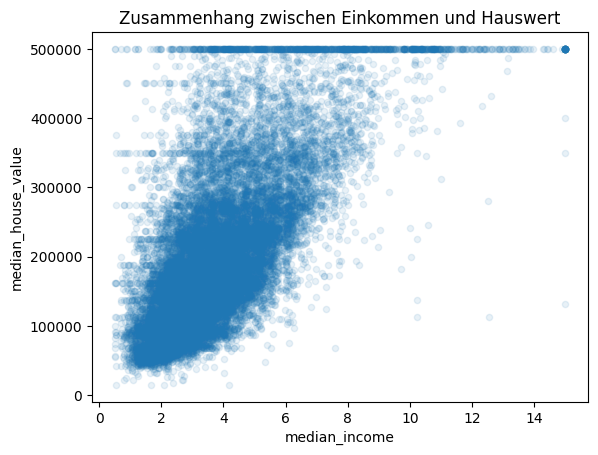

In [7]:
# Streudiagramm
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.title("Zusammenhang zwischen Einkommen und Hauswert")
plt.show()

Hier sieht man viele Punkte bei dem `median_house_value` Wert "500000", weil im "1553768847-housing.csv" die maximal-Wert von `median_house_value` bei 500000 liegt.

# 4. Skalierung eines Merkmals
Hier habe ich das Feld `median_income` skaliert, damit alle Werte im gleichen Bereich liegt.

In [8]:
scaler = MinMaxScaler()
df["income_scaled"] = scaler.fit_transform(df[["median_income"]])
df[["median_income", "income_scaled"]].head()

,median_income,income_scaled
0,8.3252,0.539668
1,8.3014,0.538027
2,7.2574,0.466028
3,5.6431,0.354699
4,3.8462,0.230776


# 5. Fazit
Man sieht, dass das Einkommen stark mit dem Hauswert zusammenhängt. Deshalb denke ich, dass die Daten gut geeignet für eine Vorhersage mit einem Regressionsmodell sind.